<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> USL MID EXAM  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### "DATASET: The DataSet contains information about Youku Tudou. Youku Tudou contains less self-produced content and more professionally created ones. They are subtitled in Mandarin.People can react on the Posts.


ATTRIBUTE INFORMATION:

1.	status_id : The Post Identification number
2.	status_type : The type of the Post
3.	num_reactions : Total Number of reaction on the particular post
4.	num_comments : Total Comments on the particular post
5.	num_shares: Total Number of Shares on the particular post
6.	num_likes : Total Number of Likes on the particular post
7.	num_loves : Total Number of Loves on the particular post
8.	num_wows : Total Number of wow reactions on the particular post
9.	num_hahas : Total Number of haha reactions on the particular post
10.	num_sads : Total Number of sad reactions on the particular post
11.	num_angrys : Total Number of angry reactions on the particular post


### 1. Data Understanding (8 marks)

#### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). Print the number of rows, cols and  types of variables? (1 mark)

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("data_set.csv")
print(df.shape)
df.info()

(1256, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 11 columns):
status_id        1256 non-null object
status_type      1256 non-null object
num_reactions    1256 non-null int64
num_comments     1256 non-null int64
num_shares       1256 non-null int64
num_likes        1256 non-null int64
num_loves        1256 non-null int64
num_wows         1256 non-null int64
num_hahas        1256 non-null int64
num_sads         1256 non-null int64
num_angrys       1256 non-null int64
dtypes: int64(9), object(2)
memory usage: 108.0+ KB


#### b Calculate five-point summary for numerical variables (1 mark) 

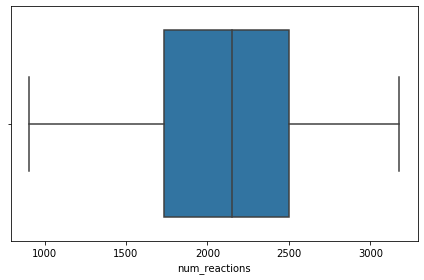

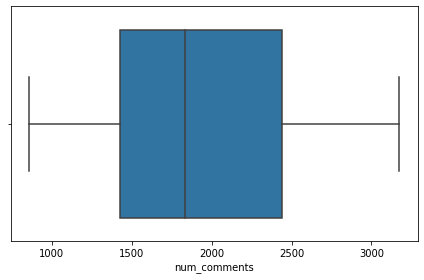

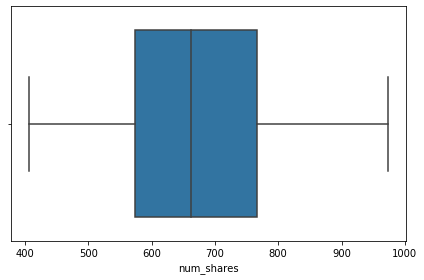

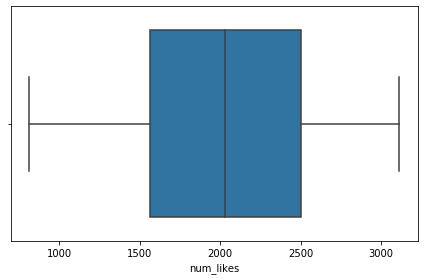

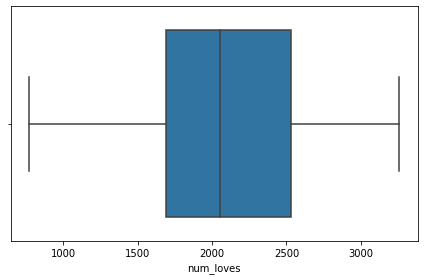

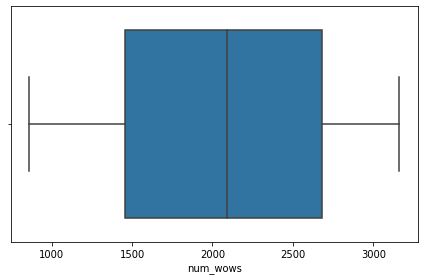

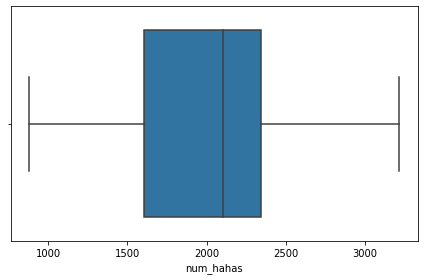

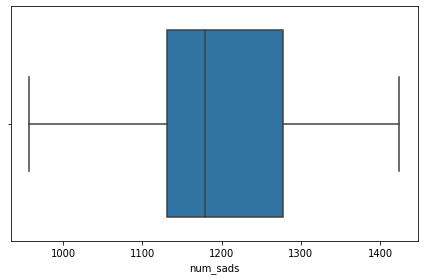

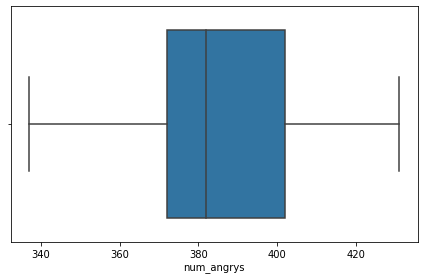

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.tight_layout()
    plt.show()
# Boxplot shows 5 point summary for each numeric variable


#### c. Is there any categorical feature present in this data ? Summarize observations for categorical variables – no. of categories, % observations in each category.  (2 MARK)

In [10]:
df.select_dtypes(include=[np.object]).describe()

,status_id,status_type
count,1256,1256
unique,1256,4
top,848451358648417_869335103226709,photo
freq,1,667


#### d. Generate the covariance and correlation tables for the data (2 mark )

In [13]:
df.corr()  # Correlation table 
df.cov()   # Covariance table

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,263297.933200,31367.494011,-65823.197582,72911.596224,-37466.121562,23470.277654,-2638.833306,529.918461,108.636846
num_comments,31367.494011,346690.355885,-7844.486733,-25443.890903,-33137.283791,-7056.726529,21127.500506,-4232.956748,-851.834757
num_shares,-65823.197582,-7844.486733,16455.570294,-18226.151090,9364.862348,-5858.468449,654.185461,-131.373163,-26.932062
num_likes,72911.596224,-25443.890903,-18226.151090,304747.013353,-11764.726785,-114237.434288,-10299.436938,2058.879265,415.117497
num_loves,-37466.121562,-33137.283791,9364.862348,-11764.726785,327237.556614,55146.563911,-3802.197860,758.270614,158.700634
num_wows,23470.277654,-7056.726529,-5858.468449,-114237.434288,55146.563911,427202.550201,-44495.881632,8897.299872,1782.113877
num_hahas,-2638.833306,21127.500506,654.185461,-10299.436938,-3802.197860,-44495.881632,281351.195980,-56272.833985,-11257.199598
num_sads,529.918461,-4232.956748,-131.373163,2058.879265,758.270614,8897.299872,-56272.833985,11255.166663,2251.554594
num_angrys,108.636846,-851.834757,-26.932062,415.117497,158.700634,1782.113877,-11257.199598,2251.554594,450.494275


##### e. Create Visualization plots to find the relationship amongst the variables. (2 mark) 

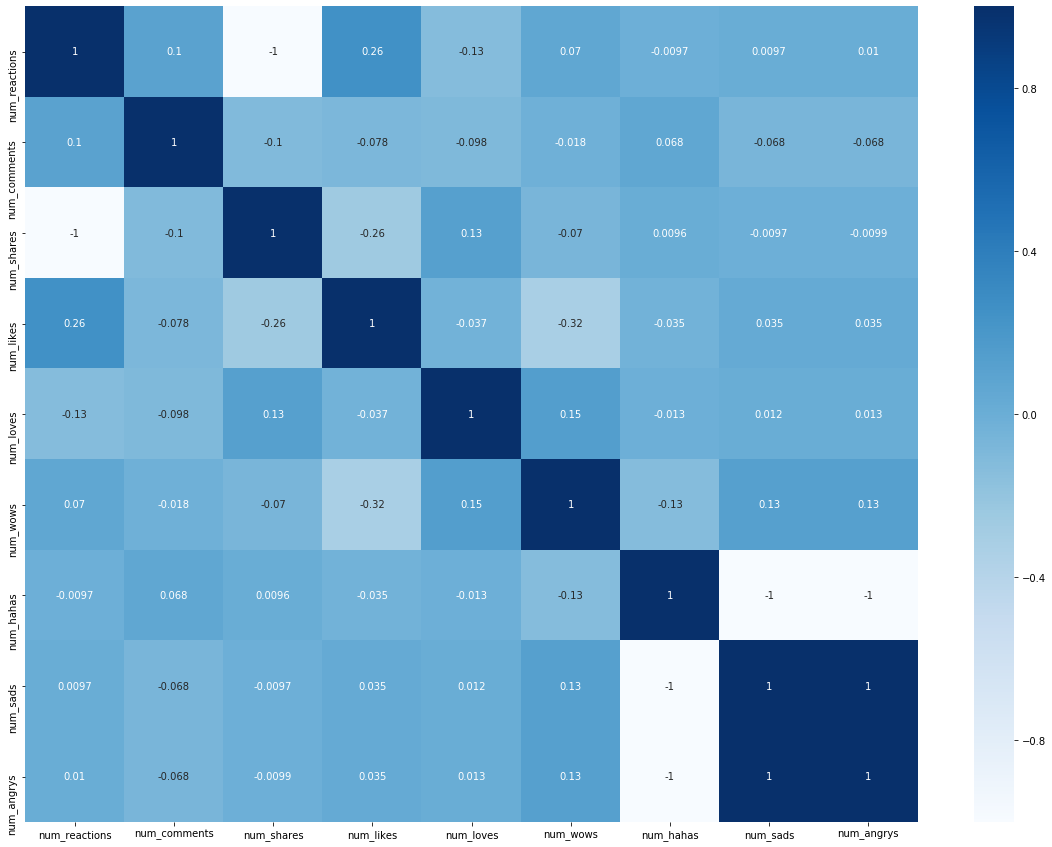

In [15]:
plt.rcParams["figure.figsize"]=[20,15]
sns.heatmap(df.corr(),annot=True,cmap="Blues")

# Num sad and Num angry are highly correlated



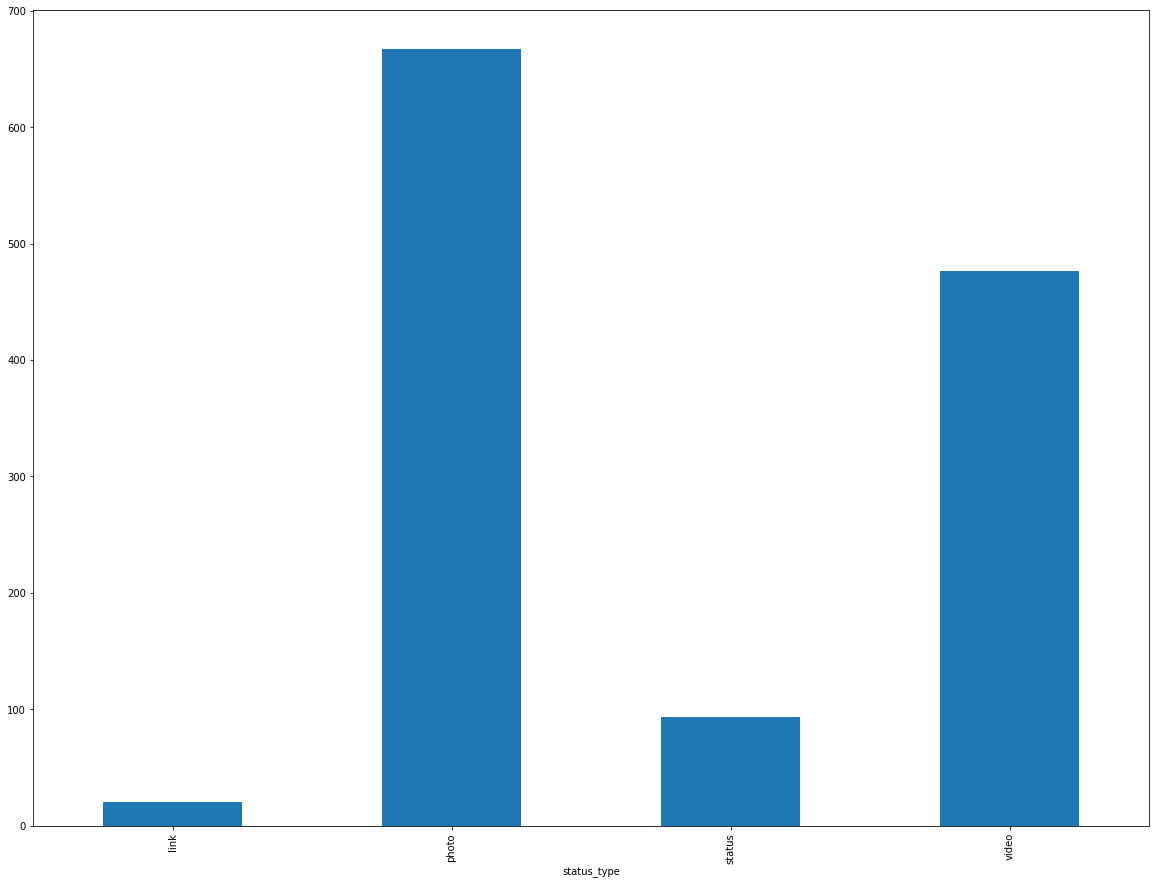

In [24]:
df.columns
pd.crosstab(df['status_id'], df['status_type']).sum().plot(kind="bar")

# Photos and videos elicited highest respose from users

### 2a.  Will PCA can be applicable on this data ? (5 marks)

### 2b.  Print the top 5 eigen values and eigen vectors. Howmuch pecentage of varaiance in the data is explained by this top 5 principle components cummulatively ? (12 marks)

In [32]:
#2a) Yes, PCA or Principal Component Analysis is applicable on this data because it is an unsupervised learning problem. 
# Using PCA we can visualise the maximum variance on first two principal components and thus see through the data.
#Visualising this information using 11 features would have been very complex.
#PCA being a dimensionality reduction technique, will help us summarize most of the information in first few principal components 
# annd so we can make use of it.

#2b) 
num=df.select_dtypes(include=np.number)
obj=df.select_dtypes(include=[np.object])
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_scaled=scaler.fit_transform(num)
num_scaled
num_scaled_df=pd.DataFrame(num_scaled,columns=num.columns)



In [47]:
obj["status_type"].value_counts()
cat=pd.get_dummies(obj["status_type"],drop_first=True)
final_df=pd.concat([num_scaled_df,cat],axis=1)

In [54]:
# final_df contains scaled, get dummies and id dropped data
from numpy.linalg import eig
cov_mat=np.cov(final_df)
eig_val,eig_vec=eig(cov_mat)
sorted_eig=list(eig_val).sort(reverse=True)

In [107]:
np.cumsum(list(eig_val))
list(eig_val)[:5] # These are top 5 eigen values
top5=sum(list(eig_val)[:5])
tot_var=sum(list(eig_val))
var_exp_top5=top5*100/tot_var
var_exp_top5  #  Almost 92% of variance is explaied by top 5 principal components


(86.34776463296112+0j)

### 3. Build the clustering model on PCA dimensions which are extracting 95 percentage of variance in the original data (25 Marks)


In [108]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6,random_state=10)
components=pca.fit_transform(final_df)
pca_df=pd.DataFrame(components,columns=["PC1","PC2","PC3","PC4","PC5","PC6"])



#### a. Find the optimal number of clusters. (6 marks)

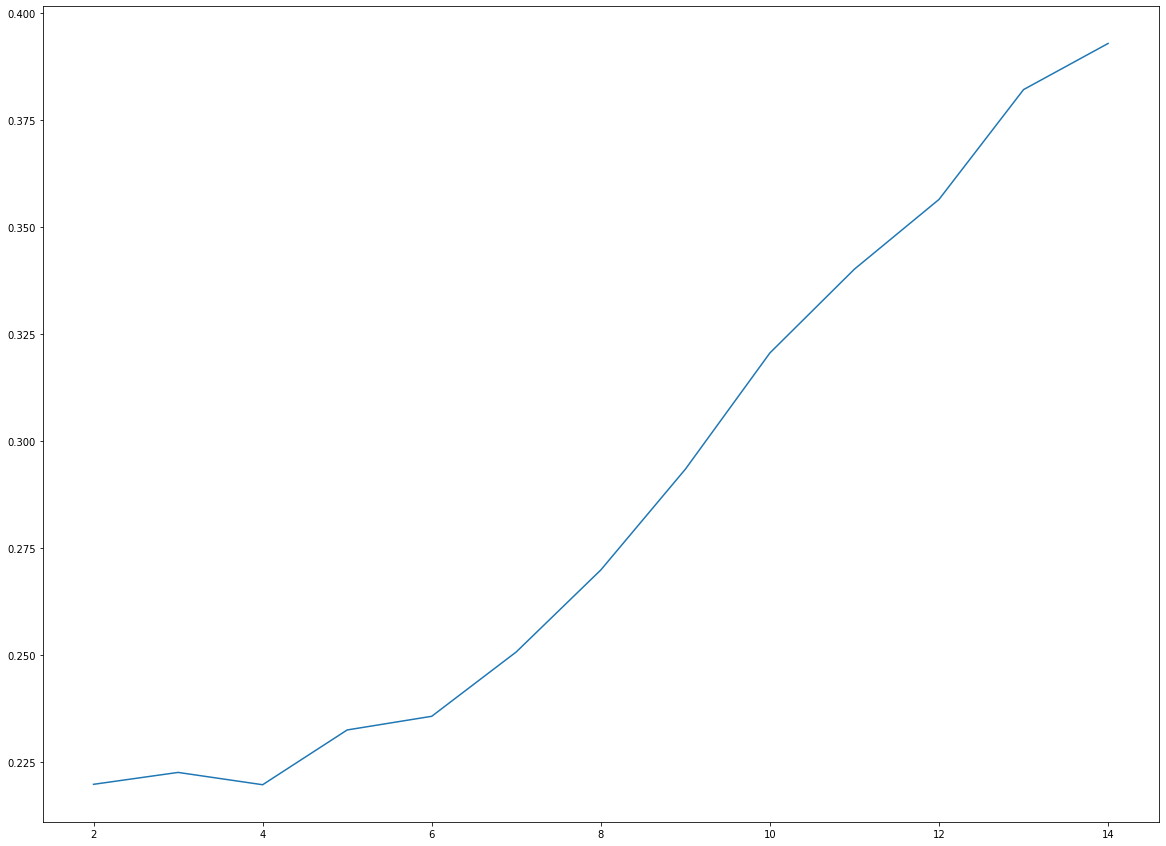

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sil_score=[]
for i in range(2,15):
    km=KMeans(n_clusters=i,random_state=10)
    km.fit(pca_df)
    score=silhouette_score(pca_df,km.labels_)
    sil_score.append(score)
plt.plot(range(2,15),sil_score)
    

#### b.	Apply Clustering with optimal value of k and find out if the data points have been clustered correctly using appropriate visualization (8 marks)


In [111]:
# So we have optimal K=3
! pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
model=KMeans(n_clusters=3,random_state=10)
viz=SilhouetteVisualizer(model,color="yellowbrick")
viz.fit(final_df)
viz.show()


OSError: "sh" shell not found

#### c.	Evaluate the quality of clusters formed using appropriate metrics to support the model built. (6 marks)

In [121]:
# We need silhouette score to evaluate the quality of clusters formed
# Silhouette score gives us the ratio of distance between clusters upon within cluster distaces.
# It tells how good the quality of our clusters is

from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=3,random_state=10)
pred=km.fit_predict(final_df)
print(silhouette_score(final_df,pred))


# Quality of cluster is not very good since silhouette score should be as close to 1 but its just 0.20

0.20475388890410556


#### d. Write down a business interpretation/explanation of the model – Use the cluster centroids to make the business inferences for each cluster groups (5 marks)

In [125]:
final_df["cluster"]=km.labels_
final_df.head()
final_df[final_df["cluster"]==0].describe()
final_df[final_df["cluster"]==1].describe()
final_df[final_df["cluster"]==2].describe()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,status,video,cluster
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.0
mean,0.764812,0.271102,-0.764838,0.215653,-0.180951,-0.122443,0.472210,-0.472160,-0.471938,0.527619,0.074286,0.384762,2.0
std,0.524090,0.977379,0.524235,0.942410,0.928981,0.894968,0.596487,0.596517,0.596653,0.499713,0.262485,0.487003,0.0
min,-0.564489,-1.817454,-2.106509,-1.793339,-2.250587,-1.731438,-0.710377,-2.043163,-2.052027,0.000000,0.000000,0.000000,2.0
25%,0.402521,-0.424246,-1.139483,-0.504873,-0.795581,-0.956965,0.098730,-0.609851,-0.590893,0.000000,0.000000,0.000000,2.0
50%,0.730057,0.484737,-0.726157,0.123956,-0.312911,-0.113615,0.366546,-0.364679,-0.355226,1.000000,0.000000,0.000000,2.0
75%,1.139476,0.980855,-0.406415,1.082603,0.547501,0.636369,0.611730,-0.100648,-0.119560,1.000000,0.000000,1.000000,2.0
max,2.106486,2.093723,0.568410,1.831037,1.647500,1.554717,2.046999,0.710304,0.728841,1.000000,1.000000,1.000000,2.0
